# MLP1L

In [110]:
import os
from PIL import Image
import numpy as np
import torch

# ——— Load model onto CPU or GPU ———
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.jit.load(r"Models and Data splits/model_MLP1L.pt", map_location=device)
model.eval()

# ——— Parent directory containing your 12 folders ———
parent_dir = r"adversarial_8bit_images"

# ——— Find all subfolders (you should have 12) ———
subfolders = [
    name for name in sorted(os.listdir(parent_dir))
    if os.path.isdir(os.path.join(parent_dir, name))
]

for folder in subfolders:
    folder_path = os.path.join(parent_dir, folder)
    pairs = []

    # ——— Process each image in this subfolder ———
    for fname in sorted(os.listdir(folder_path)):
        if not fname.lower().endswith(".png"):
            continue

        # Extract true label from e.g. "true0_adv2_mag44.3_sample22.png"
        true_label = int(fname.split('_')[0][4:])

        # Load + normalize
        img = Image.open(os.path.join(folder_path, fname)).convert("L")
        arr = np.array(img, dtype=np.float32) / 255.0
        if arr.shape != (28, 28):
            arr = np.array(img.resize((28, 28)), dtype=np.float32) / 255.0

        x = torch.from_numpy(arr.reshape(1, -1)).to(device)

        # Forward pass
        with torch.no_grad():
            pred = int(model(x).argmax(dim=1))

        pairs.append((true_label, pred))

    # ——— Compute stats for this folder ———
    total         = len(pairs)
    misclassified = sum(1 for t, p in pairs if p != t)
    rate_pct      = (misclassified / total * 100) if total > 0 else 0.0

    # ——— Print results for this folder ———
    print(f"Folder: {folder}")
    print(f"  Total images         : {total}")
    print(f"  Misclassified images : {misclassified}")
    print(f"  Misclassification rate: {rate_pct:.2f}%\n")


Folder: CNN_test
  Total images         : 129
  Misclassified images : 127
  Misclassification rate: 98.45%

Folder: CNN_train
  Total images         : 127
  Misclassified images : 127
  Misclassification rate: 100.00%

Folder: DT_test
  Total images         : 446
  Misclassified images : 57
  Misclassification rate: 12.78%

Folder: DT_train
  Total images         : 460
  Misclassified images : 50
  Misclassification rate: 10.87%

Folder: MLP1L_test
  Total images         : 478
  Misclassified images : 478
  Misclassification rate: 100.00%

Folder: MLP1L_train
  Total images         : 482
  Misclassified images : 482
  Misclassification rate: 100.00%

Folder: MLP2L_test
  Total images         : 410
  Misclassified images : 356
  Misclassification rate: 86.83%

Folder: MLP2L_train
  Total images         : 397
  Misclassified images : 341
  Misclassification rate: 85.89%

Folder: RF_test
  Total images         : 396
  Misclassified images : 38
  Misclassification rate: 9.60%

Folder: RF_

# MLP2L

In [112]:
import os
from PIL import Image
import numpy as np
import torch

# ——— Load model onto CPU or GPU ———
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.jit.load(r"Models and Data splits/model_MLP2L.pt", map_location=device)
model.eval()

# ——— Parent directory containing your 12 folders ———
parent_dir = r"adversarial_8bit_images"

# ——— Find all subfolders (you should have 12) ———
subfolders = [
    name for name in sorted(os.listdir(parent_dir))
    if os.path.isdir(os.path.join(parent_dir, name))
]

for folder in subfolders:
    folder_path = os.path.join(parent_dir, folder)
    pairs = []

    # ——— Process each image in this subfolder ———
    for fname in sorted(os.listdir(folder_path)):
        if not fname.lower().endswith(".png"):
            continue

        # Extract true label from e.g. "true0_adv2_mag44.3_sample22.png"
        true_label = int(fname.split('_')[0][4:])

        # Load + normalize
        img = Image.open(os.path.join(folder_path, fname)).convert("L")
        arr = np.array(img, dtype=np.float32) / 255.0
        if arr.shape != (28, 28):
            arr = np.array(img.resize((28, 28)), dtype=np.float32) / 255.0

        x = torch.from_numpy(arr.reshape(1, -1)).to(device)

        # Forward pass
        with torch.no_grad():
            pred = int(model(x).argmax(dim=1))

        pairs.append((true_label, pred))

    # ——— Compute stats for this folder ———
    total         = len(pairs)
    misclassified = sum(1 for t, p in pairs if p != t)
    rate_pct      = (misclassified / total * 100) if total > 0 else 0.0

    # ——— Print results for this folder ———
    print(f"Folder: {folder}")
    print(f"  Total images         : {total}")
    print(f"  Misclassified images : {misclassified}")
    print(f"  Misclassification rate: {rate_pct:.2f}%\n")


Folder: CNN_test
  Total images         : 129
  Misclassified images : 110
  Misclassification rate: 85.27%

Folder: CNN_train
  Total images         : 127
  Misclassified images : 115
  Misclassification rate: 90.55%

Folder: DT_test
  Total images         : 446
  Misclassified images : 23
  Misclassification rate: 5.16%

Folder: DT_train
  Total images         : 460
  Misclassified images : 29
  Misclassification rate: 6.30%

Folder: MLP1L_test
  Total images         : 478
  Misclassified images : 63
  Misclassification rate: 13.18%

Folder: MLP1L_train
  Total images         : 482
  Misclassified images : 63
  Misclassification rate: 13.07%

Folder: MLP2L_test
  Total images         : 410
  Misclassified images : 410
  Misclassification rate: 100.00%

Folder: MLP2L_train
  Total images         : 397
  Misclassified images : 397
  Misclassification rate: 100.00%

Folder: RF_test
  Total images         : 396
  Misclassified images : 11
  Misclassification rate: 2.78%

Folder: RF_train

# CNN

In [114]:
import os
from PIL import Image
import numpy as np
import torch

# ——— Load your CNN (expects input shape [batch,1,28,28]) ———
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = torch.jit.load(r"Models and Data splits/model_CNN.pt", map_location=device)
model.eval()

# ——— Parent directory containing your 12 folders ———
parent_dir = r"adversarial_8bit_images"

# ——— Discover all subfolders ———
subfolders = [
    name for name in sorted(os.listdir(parent_dir))
    if os.path.isdir(os.path.join(parent_dir, name))
]

for folder in subfolders:
    folder_path = os.path.join(parent_dir, folder)
    pairs = []

    # ——— Process each image in this subfolder ———
    for fname in sorted(os.listdir(folder_path)):
        if not fname.lower().endswith(".png"):
            continue

        # Extract true label from "true0_adv2_mag44.3_sample22.png"
        true_label = int(fname.split('_')[0][4:])

        # Load as grayscale and normalize to [0,1]
        img = Image.open(os.path.join(folder_path, fname)).convert("L")
        arr = np.array(img, dtype=np.float32) / 255.0

        # Ensure exactly 28×28
        if arr.shape != (28, 28):
            arr = np.array(img.resize((28, 28)), dtype=np.float32) / 255.0

        # Build tensor of shape (1, 1, 28, 28)
        x = torch.from_numpy(arr).unsqueeze(0).unsqueeze(0).to(device)

        # Inference
        with torch.no_grad():
            pred = int(model(x).argmax(dim=1))

        pairs.append((true_label, pred))

    # ——— Compute stats for this folder ———
    total         = len(pairs)
    misclassified = sum(1 for t, p in pairs if p != t)
    rate_pct      = (misclassified / total * 100) if total > 0 else 0.0

    # ——— Print results for this folder ———
    print(f"Folder: {folder}")
    print(f"  Total images         : {total}")
    print(f"  Misclassified images : {misclassified}")
    print(f"  Misclassification rate: {rate_pct:.2f}%\n")


Folder: CNN_test
  Total images         : 129
  Misclassified images : 129
  Misclassification rate: 100.00%

Folder: CNN_train
  Total images         : 127
  Misclassified images : 127
  Misclassification rate: 100.00%

Folder: DT_test
  Total images         : 446
  Misclassified images : 3
  Misclassification rate: 0.67%

Folder: DT_train
  Total images         : 460
  Misclassified images : 1
  Misclassification rate: 0.22%

Folder: MLP1L_test
  Total images         : 478
  Misclassified images : 2
  Misclassification rate: 0.42%

Folder: MLP1L_train
  Total images         : 482
  Misclassified images : 0
  Misclassification rate: 0.00%

Folder: MLP2L_test
  Total images         : 410
  Misclassified images : 15
  Misclassification rate: 3.66%

Folder: MLP2L_train
  Total images         : 397
  Misclassified images : 6
  Misclassification rate: 1.51%

Folder: RF_test
  Total images         : 396
  Misclassified images : 1
  Misclassification rate: 0.25%

Folder: RF_train
  Total ima

## Decision Tree (DT)

In [118]:
import os
from PIL import Image
import numpy as np
import joblib

# ——— Load Decision Tree model ———
dt_path = r"Models and Data splits/model_DT.pkl"
model = joblib.load(dt_path)

# ——— Parent directory containing your 12 subfolders ———
parent_dir = r"adversarial_8bit_images"

# ——— Discover all subfolders ———
subfolders = [
    name for name in sorted(os.listdir(parent_dir))
    if os.path.isdir(os.path.join(parent_dir, name))
]

for folder in subfolders:
    folder_path = os.path.join(parent_dir, folder)
    pairs = []

    # ——— Process each image in this subfolder ———
    for fname in sorted(os.listdir(folder_path)):
        if not fname.lower().endswith(".png"):
            continue

        # Extract true label from "true0_adv2_mag44.3_sample22.png"
        true_label = int(fname.split('_')[0][4:])

        # Load as grayscale and normalize to [0,1]
        img = Image.open(os.path.join(folder_path, fname)).convert("L")
        arr = np.array(img, dtype=np.float32) / 255.0

        # Ensure exactly 28×28
        if arr.shape != (28, 28):
            arr = np.array(img.resize((28, 28)), dtype=np.float32) / 255.0

        # Flatten to shape (1, 784) for scikit-learn
        x = arr.reshape(1, -1)

        # Predict with the Decision Tree
        pred = model.predict(x)[0]

        pairs.append((true_label, pred))

    # ——— Compute stats for this folder ———
    total         = len(pairs)
    misclassified = sum(1 for t, p in pairs if p != t)
    rate_pct      = (misclassified / total * 100) if total > 0 else 0.0

    # ——— Print results for this folder ———
    print(f"Folder: {folder}")
    print(f"  Total images         : {total}")
    print(f"  Misclassified images : {misclassified}")
    print(f"  Misclassification rate: {rate_pct:.2f}%\n")


Folder: CNN_test
  Total images         : 129
  Misclassified images : 114
  Misclassification rate: 88.37%

Folder: CNN_train
  Total images         : 127
  Misclassified images : 114
  Misclassification rate: 89.76%

Folder: DT_test
  Total images         : 446
  Misclassified images : 446
  Misclassification rate: 100.00%

Folder: DT_train
  Total images         : 460
  Misclassified images : 460
  Misclassification rate: 100.00%

Folder: MLP1L_test
  Total images         : 478
  Misclassified images : 370
  Misclassification rate: 77.41%

Folder: MLP1L_train
  Total images         : 482
  Misclassified images : 384
  Misclassification rate: 79.67%

Folder: MLP2L_test
  Total images         : 410
  Misclassified images : 337
  Misclassification rate: 82.20%

Folder: MLP2L_train
  Total images         : 397
  Misclassified images : 335
  Misclassification rate: 84.38%

Folder: RF_test
  Total images         : 396
  Misclassified images : 282
  Misclassification rate: 71.21%

Folder: 

## Random Forests (RF)

In [120]:
import os
from PIL import Image
import numpy as np
import joblib

# ——— Load Random Forest model ———
rf_path = r"Models and Data splits/model_RF.pkl"
model   = joblib.load(rf_path)

# ——— Parent directory containing your 12 subfolders ———
parent_dir = r"adversarial_8bit_images"

# ——— Discover all subfolders ———
subfolders = [
    name for name in sorted(os.listdir(parent_dir))
    if os.path.isdir(os.path.join(parent_dir, name))
]

for folder in subfolders:
    folder_path = os.path.join(parent_dir, folder)
    pairs = []

    # ——— Process each image in this subfolder ———
    for fname in sorted(os.listdir(folder_path)):
        if not fname.lower().endswith(".png"):
            continue

        # Extract true label from "true0_adv2_mag44.3_sample22.png"
        true_label = int(fname.split('_')[0][4:])

        # Load as grayscale and normalize to [0,1]
        img = Image.open(os.path.join(folder_path, fname)).convert("L")
        arr = np.array(img, dtype=np.float32) / 255.0

        # Ensure exactly 28×28
        if arr.shape != (28, 28):
            arr = np.array(img.resize((28, 28)), dtype=np.float32) / 255.0

        # Flatten to shape (1, 784) for scikit-learn
        x = arr.reshape(1, -1)

        # Predict with the Random Forest
        pred = model.predict(x)[0]

        pairs.append((true_label, pred))

    # ——— Compute stats for this folder ———
    total         = len(pairs)
    misclassified = sum(1 for t, p in pairs if p != t)
    rate_pct      = (misclassified / total * 100) if total > 0 else 0.0

    # ——— Print results for this folder ———
    print(f"Folder: {folder}")
    print(f"  Total images         : {total}")
    print(f"  Misclassified images : {misclassified}")
    print(f"  Misclassification rate: {rate_pct:.2f}%\n")


Folder: CNN_test
  Total images         : 129
  Misclassified images : 122
  Misclassification rate: 94.57%

Folder: CNN_train
  Total images         : 127
  Misclassified images : 122
  Misclassification rate: 96.06%

Folder: DT_test
  Total images         : 446
  Misclassified images : 188
  Misclassification rate: 42.15%

Folder: DT_train
  Total images         : 460
  Misclassified images : 195
  Misclassification rate: 42.39%

Folder: MLP1L_test
  Total images         : 478
  Misclassified images : 358
  Misclassification rate: 74.90%

Folder: MLP1L_train
  Total images         : 482
  Misclassified images : 366
  Misclassification rate: 75.93%

Folder: MLP2L_test
  Total images         : 410
  Misclassified images : 353
  Misclassification rate: 86.10%

Folder: MLP2L_train
  Total images         : 397
  Misclassified images : 337
  Misclassification rate: 84.89%

Folder: RF_test
  Total images         : 396
  Misclassified images : 396
  Misclassification rate: 100.00%

Folder: R

## K-nearest Kneighbor (kNN)

In [122]:
import os
from PIL import Image
import numpy as np
import joblib

# ——— Load kNN model (k=5) ———
knn_path = r"Models and Data splits/model_kNN.pkl"
model    = joblib.load(knn_path)

# ——— Parent directory containing your 12 subfolders ———
parent_dir = r"adversarial_8bit_images"

# ——— Discover all subfolders ———
subfolders = [
    name for name in sorted(os.listdir(parent_dir))
    if os.path.isdir(os.path.join(parent_dir, name))
]

for folder in subfolders:
    folder_path = os.path.join(parent_dir, folder)
    pairs = []

    # ——— Process each image in this subfolder ———
    for fname in sorted(os.listdir(folder_path)):
        if not fname.lower().endswith(".png"):
            continue

        # Extract true label from "true0_adv2_mag44.3_sample22.png"
        true_label = int(fname.split('_')[0][4:])

        # Load as grayscale and normalize to [0,1]
        img = Image.open(os.path.join(folder_path, fname)).convert("L")
        arr = np.array(img, dtype=np.float32) / 255.0

        # Ensure exactly 28×28
        if arr.shape != (28, 28):
            arr = np.array(img.resize((28, 28)), dtype=np.float32) / 255.0

        # Flatten to shape (1, 784) for scikit-learn
        x = arr.reshape(1, -1)

        # Predict with kNN
        pred = model.predict(x)[0]

        pairs.append((true_label, pred))

    # ——— Compute stats for this folder ———
    total         = len(pairs)
    misclassified = sum(1 for t, p in pairs if p != t)
    rate_pct      = (misclassified / total * 100) if total > 0 else 0.0

    # ——— Print results for this folder ———
    print(f"Folder: {folder}")
    print(f"  Total images         : {total}")
    print(f"  Misclassified images : {misclassified}")
    print(f"  Misclassification rate: {rate_pct:.2f}%\n")


Folder: CNN_test
  Total images         : 129
  Misclassified images : 1
  Misclassification rate: 0.78%

Folder: CNN_train
  Total images         : 127
  Misclassified images : 6
  Misclassification rate: 4.72%

Folder: DT_test
  Total images         : 446
  Misclassified images : 0
  Misclassification rate: 0.00%

Folder: DT_train
  Total images         : 460
  Misclassified images : 1
  Misclassification rate: 0.22%

Folder: MLP1L_test
  Total images         : 478
  Misclassified images : 3
  Misclassification rate: 0.63%

Folder: MLP1L_train
  Total images         : 482
  Misclassified images : 2
  Misclassification rate: 0.41%

Folder: MLP2L_test
  Total images         : 410
  Misclassified images : 7
  Misclassification rate: 1.71%

Folder: MLP2L_train
  Total images         : 397
  Misclassified images : 5
  Misclassification rate: 1.26%

Folder: RF_test
  Total images         : 396
  Misclassified images : 1
  Misclassification rate: 0.25%

Folder: RF_train
  Total images      

# Visualization

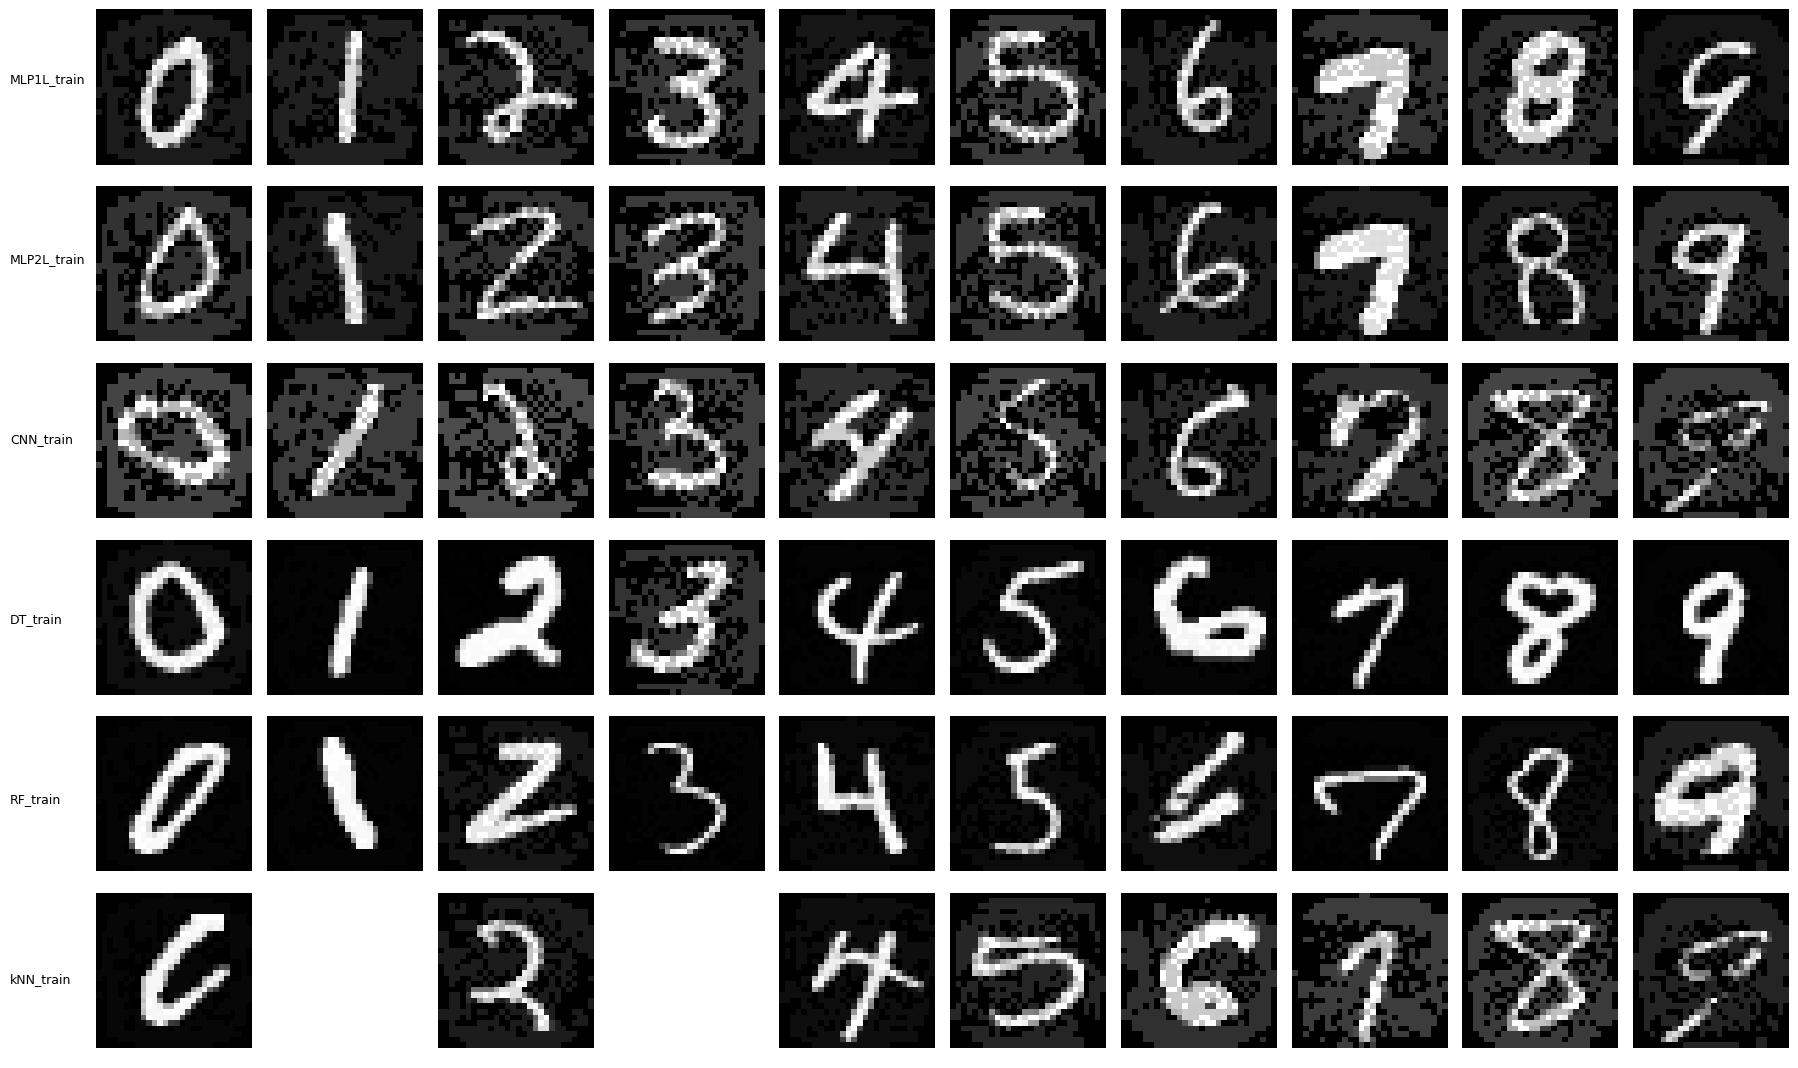

In [43]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re

# ——— CONFIG ———
folder_paths = [
    r"C:\Users\dyari\OneDrive\Desktop\MultReg\adversarial_8bit_images\MLP1L_train",
    r"C:\Users\dyari\OneDrive\Desktop\MultReg\adversarial_8bit_images\MLP2L_train",
    r"C:\Users\dyari\OneDrive\Desktop\MultReg\adversarial_8bit_images\CNN_train",
    r"C:\Users\dyari\OneDrive\Desktop\MultReg\adversarial_8bit_images\DT_train",
    r"C:\Users\dyari\OneDrive\Desktop\MultReg\adversarial_8bit_images\RF_train",
    r"C:\Users\dyari\OneDrive\Desktop\MultReg\adversarial_8bit_images\kNN_train"
]
folder_labels = [os.path.basename(p) for p in folder_paths]
digit_pattern = re.compile(r'true(\d)')

# Build mapping: digit → folder_label → [files]
digit_images = {
    str(d): {lbl: [] for lbl in folder_labels}
    for d in range(10)
}
for folder_path, label in zip(folder_paths, folder_labels):
    for fname in os.listdir(folder_path):
        if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            m = digit_pattern.search(fname)
            if m:
                digit_images[m.group(1)][label].append(os.path.join(folder_path, fname))

# ——— PLOTTING: rows=folders, cols=digits ———
n_rows = len(folder_labels)
n_cols = 10
fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(n_cols * 1.8, n_rows * 1.8),  # slightly tighter cells
    squeeze=False
)

for i, label in enumerate(folder_labels):
    for j, digit in enumerate(map(str, range(10))):
        ax = axes[i][j]
        files = digit_images[digit][label]
        if files:
            img = mpimg.imread(random.choice(files))
            ax.imshow(img, cmap='gray')
        ax.axis('off')

# TIGHTEN UP ALL MARGINS AND SPACING
plt.subplots_adjust(
    left=0.05,   # minimal left margin
    right=0.99,
    top=0.99,
    bottom=0.01,
    wspace=0.1, # virtually no horizontal gap
    hspace=0.01  # virtually no vertical gap
)

# Put model names out in the far left margin, with almost no offset
for i, label in enumerate(folder_labels):
    y = 1 - (i + 0.5) / n_rows
    fig.text(
        0.002,     # almost at the very left edge
        y,
        label,
        va='center',
        ha='left',
        fontsize=9
    )

plt.savefig('sample_per_model.jpg', dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()
